In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [20]:
def makeKernel(size):
    if size==3:
        kernel = np.ones((3,3))*1/9
    elif size == 5 :
        kernel = np.ones((5,5))*1/25
    elif size == 7:
        kernel = np.ones((7,7))*1/49
    return kernel

In [21]:
#flip horizontally
def flipKernelHorizontally(kernel,size):
    horizontalKernel = np.zeros((size,size),dtype=np.float64)
    temp=0
    for i in range(0,size):
        temp=0
        for j in range(size-1,-1,-1):
            horizontalKernel[i][temp]=kernel[i][j]
            temp=temp+1
    return horizontalKernel 

In [22]:
def flipKernelVertically(kernel,size):
    verticalKernel = np.zeros((size,size),dtype=np.float64)
    temp=0
    for x in range(size-1,-1,-1):
        for y in range(0,size):
            verticalKernel[temp][y]=kernel[x][y]
        temp=temp+1
    return verticalKernel
   


In [23]:
def padYourImage(channel,maskSize):
    #zero padding approach
    # for 3x3 mask   (1 zero padding (3-1)/2)
    #for 5x5 mask    (2 zeroes padding (5-1)/2)
    #for 7x7 mask    (3 zeroes padding (7-1)/2)

    rowsToPad = int((maskSize - 1)/2)
    colsToPad = int((maskSize - 1)/2)

    totalRows = rowsToPad * 2
    totalCols = colsToPad * 2

    r = img.shape[0] 
    c = img.shape[1]

    a=0
    b=0

    
    paddedImage = np.zeros((r+totalRows,c+totalCols),dtype=np.float64)
    for i in range(rowsToPad, r + totalRows - rowsToPad):
        b=0
        for j in range(colsToPad, c + totalCols - colsToPad):
            paddedImage[i][j]=channel[a][b]
            b=b+1
        a=a+1
    return paddedImage  

In [24]:
#convolution 
def ImageConvolution(paddedImage,kernel,maskSize):
    sum = 0
    rowsToPad = int((maskSize - 1)/2)
    colsToPad = int((maskSize - 1)/2)

    totalRowsToPad = rowsToPad * 2
    totalColsToPad = colsToPad * 2

    r = img.shape[0] 
    c = img.shape[1]

    a=0
    b=0
    
    convolutedImg = np.zeros((r, c), dtype = np.float64)

    for i in range(rowsToPad, r + totalRowsToPad - rowsToPad) :
        b = 0
        for j in range(colsToPad, c + totalColsToPad - colsToPad) :
            sum=0
            x = i - rowsToPad
            for k in range(0, maskSize) :
                y = j - colsToPad
                for l in range(0, maskSize) :
                    sum += kernel[k][l] * paddedImage[x][y]
                    y = y + 1
                x = x + 1
            convolutedImg[a][b] = sum
            b = b + 1
        a = a + 1 
    return convolutedImg

In [25]:
def normalizeImage(image):
    MinValue = image.min()
    MaxValue = image.max()
    rows = image.shape[0]
    cols = image.shape[1]
    normalizeImg = np.zeros((rows,cols),dtype=np.float64)
    for i in range(0,rows):
        for j in range(0,cols):
            if (image[i][j]>255):
                normalizeImg[i][j] = 255
            elif image[i][j]<0:
                normalizeImg[i][j] = 0
            else:
                normalizeImg[i][j] = image[i][j]
    return normalizeImg

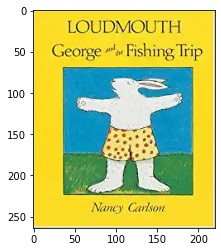

In [26]:
img = cv.imread('book.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

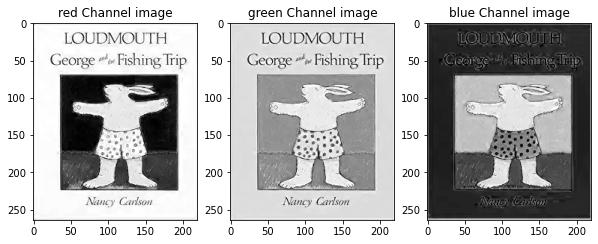

In [27]:
redChannel = img[:,:,0] 
greenChannel = img[:,:,1]
blueChannel =  img[:,:,2]

fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("red Channel image")
plt.imshow(redChannel,cmap="gray")

plt.subplot(1,3,2)
plt.title("green Channel image")
plt.imshow(greenChannel,cmap="gray")

plt.subplot(1,3,3)
plt.title("blue Channel image")
plt.imshow(blueChannel,cmap="gray")

In [28]:
ThreeByThree_kernel = makeKernel(3)
FiveByFive_kernel = makeKernel(5)
SevenBySeven_kernel = makeKernel(7)

In [29]:
H_FlippedKernel_3 = flipKernelHorizontally(ThreeByThree_kernel,3) 
ThreeByThree_kernel = flipKernelVertically(H_FlippedKernel_3,3) 

H_FlippedKernel_5 = flipKernelHorizontally(FiveByFive_kernel,5) 
FiveByFive_kernel = flipKernelVertically(H_FlippedKernel_5,5) 

H_FlippedKernel_7 = flipKernelHorizontally(SevenBySeven_kernel,7) 
SevenBySeven_kernel = flipKernelVertically(H_FlippedKernel_7,7)


In [30]:
#getting padded images of three channel for 3 different kernels
#3 by 3 channels padding
redPaddedImage_3 = padYourImage(redChannel,3)
greenPaddedImage_3 = padYourImage(greenChannel,3)
bluePaddedImage_3 = padYourImage(blueChannel,3)

#5 by 5 channels padding
redPaddedImage_5 = padYourImage(redChannel,5)
greenPaddedImage_5 = padYourImage(greenChannel,5)
bluePaddedImage_5 = padYourImage(blueChannel,5)

#7 by 7 channels padding
redPaddedImage_7 = padYourImage(redChannel,7)
greenPaddedImage_7 = padYourImage(greenChannel,7)
bluePaddedImage_7 = padYourImage(blueChannel,7)

In [31]:
#getting convoluted images of three channel for 3 different kernels      

#3 by 3 kernel
redConvlutedImage_3 = ImageConvolution(redPaddedImage_3,ThreeByThree_kernel,3)
greenConvlutedImage_3 = ImageConvolution(greenPaddedImage_3,ThreeByThree_kernel,3)
blueConvlutedImage_3 = ImageConvolution(bluePaddedImage_3,ThreeByThree_kernel,3)

#5 by 5 kernel
redConvlutedImage_5 = ImageConvolution(redPaddedImage_5,FiveByFive_kernel,5)
greenConvlutedImage_5 = ImageConvolution(greenPaddedImage_5,FiveByFive_kernel,5)
blueConvlutedImage_5 = ImageConvolution(bluePaddedImage_5,FiveByFive_kernel,5)

#7 by 7 kernel
redConvlutedImage_7 = ImageConvolution(redPaddedImage_7,SevenBySeven_kernel,7)
greenConvlutedImage_7 = ImageConvolution(greenPaddedImage_7,SevenBySeven_kernel,7)
blueConvlutedImage_7 = ImageConvolution(bluePaddedImage_7,SevenBySeven_kernel,7)  

In [32]:
#getting final images of three channel for 3 different kernels 

#3 by 3 kernel
redChannelFinal_3 = normalizeImage(redConvlutedImage_3) 
greenChannelFinal_3 = normalizeImage(greenConvlutedImage_3)
blueChannelFinal_3 = normalizeImage(blueConvlutedImage_3)

#5 by 5 kernel
redChannelFinal_5 = normalizeImage(redConvlutedImage_5) 
greenChannelFinal_5 = normalizeImage(greenConvlutedImage_5)
blueChannelFinal_5 = normalizeImage(blueConvlutedImage_5)

#7 by 7 kernel
redChannelFinal_7 = normalizeImage(redConvlutedImage_7) 
greenChannelFinal_7 = normalizeImage(greenConvlutedImage_7)
blueChannelFinal_7 = normalizeImage(blueConvlutedImage_7)


In [33]:
ThreeByThree_ConvolutedImg = np.zeros((img.shape[0],img.shape[1],3),dtype=np.float64)  
FiveByFive_ConvolutedImg = np.zeros((img.shape[0],img.shape[1],3),dtype=np.float64)  
SevenBySeven_ConvolutedImg = np.zeros((img.shape[0],img.shape[1],3),dtype=np.float64)  

In [34]:
ThreeByThree_ConvolutedImg[:,:,0] = redChannelFinal_3
ThreeByThree_ConvolutedImg[:,:,1] = greenChannelFinal_3
ThreeByThree_ConvolutedImg[:,:,2] = blueChannelFinal_3

FiveByFive_ConvolutedImg[:,:,0] = redChannelFinal_5
FiveByFive_ConvolutedImg[:,:,1] = greenChannelFinal_5
FiveByFive_ConvolutedImg[:,:,2] = blueChannelFinal_5

SevenBySeven_ConvolutedImg[:,:,0] = redChannelFinal_7
SevenBySeven_ConvolutedImg[:,:,1] = greenChannelFinal_7
SevenBySeven_ConvolutedImg[:,:,2] = blueChannelFinal_7


True

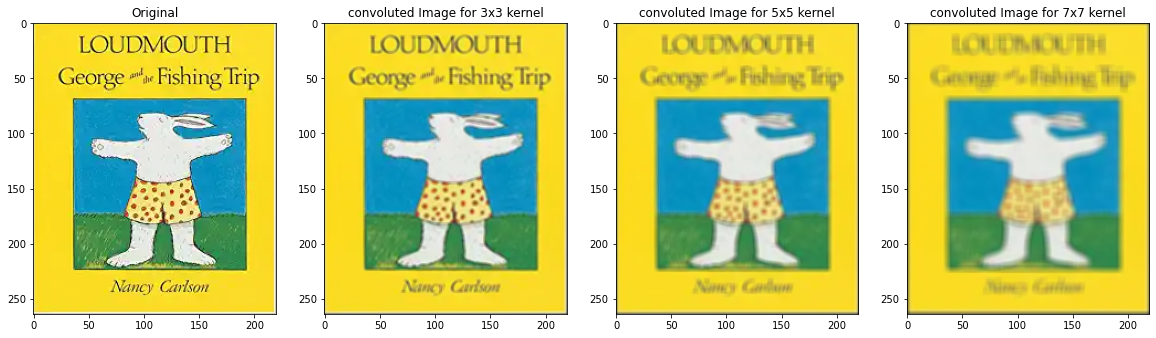

In [35]:
fig = plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title("Original")
plt.imshow(img)

plt.subplot(142)
plt.title("convoluted Image for 3x3 kernel")
plt.imshow(ThreeByThree_ConvolutedImg.astype('uint8'))


plt.subplot(143)
plt.title("convoluted Image for 5x5 kernel")
plt.imshow(FiveByFive_ConvolutedImg.astype('uint8'))

plt.subplot(144)
plt.title("convoluted Image for 7x7 kernel")
plt.imshow(SevenBySeven_ConvolutedImg.astype('uint8'))

cv.imwrite("ThreeByThree_ConvolutedImg.jpg",cv.cvtColor(ThreeByThree_ConvolutedImg.astype('uint8'), cv.COLOR_BGR2RGB))
cv.imwrite("FiveByFive_ConvolutedImg.jpg",cv.cvtColor(FiveByFive_ConvolutedImg.astype('uint8'), cv.COLOR_BGR2RGB))
cv.imwrite("SevenBySeven_ConvolutedImg.jpg",cv.cvtColor(SevenBySeven_ConvolutedImg.astype('uint8'), cv.COLOR_BGR2RGB))

True

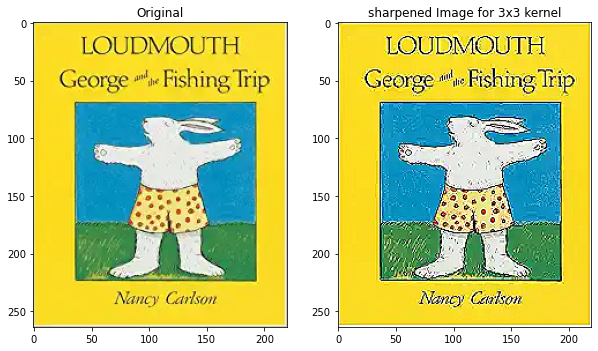

In [36]:
#sharpening of image

myMask = [
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
]
H_Flipped = flipKernelHorizontally(myMask,3) 
FinalMask = flipKernelVertically(H_Flipped,3) 

redPaddedImage = padYourImage(redChannel,3)
greenPaddedImage = padYourImage(greenChannel,3)
bluePaddedImage = padYourImage(blueChannel,3)


redConvlutedImage = ImageConvolution(redPaddedImage,FinalMask,3)
greenConvlutedImage = ImageConvolution(greenPaddedImage,FinalMask,3)
blueConvlutedImage = ImageConvolution(bluePaddedImage,FinalMask,3)

redChannelFinal = normalizeImage(redConvlutedImage) 
greenChannelFinal = normalizeImage(greenConvlutedImage) 
blueChannelFinal = normalizeImage(blueConvlutedImage)

ConvolutedImg = np.zeros((img.shape[0],img.shape[1],3),dtype=np.float64) 
ConvolutedImg[:,:,0] = redChannelFinal
ConvolutedImg[:,:,1] = greenChannelFinal
ConvolutedImg[:,:,2] = blueChannelFinal


fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title("Original")
plt.imshow(img)

plt.subplot(122)
plt.title("sharpened Image for 3x3 kernel")
plt.imshow(ConvolutedImg.astype('uint8'))

cv.imwrite("SharpenedImg.jpg",cv.cvtColor(ConvolutedImg.astype('uint8'), cv.COLOR_BGR2RGB))
